In [1]:
import keras
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())

    
    
arenakap = {486:6594,413:14500,433:4200,420:6150,415:6000,425:3300,430:6000,426:5002,540:3140,418:6200,421:4003,422:3603,483:3076,477:3447,428:3000,439:4200,517:3533,432:3132}

dataset=[]

for i in range(0,len(games['competition'][0]['spiel'])):
    datasetrow=[]     
    datasetrow.append(games['competition'][0]['spiel'][i]['home_id'])
    datasetrow.append(games['competition'][0]['spiel'][i]['gast_id'])
    datasetrow.append(int(games['competition'][0]['spiel'][i]['home_result']>games['competition'][0]['spiel'][i]['gast_result']))
    datasetrow.append(int(games['competition'][0]['spiel'][i]['zuschauer']))
    datasetrow.append(arenakap[int(games['competition'][0]['spiel'][i]['home_id'])])
    
    dataset.append(datasetrow)


# Umwandlung des Datasets in ein Numpy Array 
import numpy as np
# : bedeutet in diesem Fall auslesen aller zeilen
dataset=np.asarray(dataset)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_home_ids = encoder.fit_transform(dataset[:,0])


#ohne fit, damit die Teams eindeutig bleiben, nur transformation notwendig
transformed_gast_ids = encoder.transform(dataset[:,1])

# Umformung der Zuschauer in eine Spalte (vorher war es nur eine Zeile)
#print(np.reshape(dataset[:,3],(306,1)))

# Featurescaling der Zuschaueranzahl & Hallenkapazitäten
from sklearn.preprocessing import MinMaxScaler

arenaKap_scaler=MinMaxScaler()
arenaKap_scaler.fit([[0],[14500]]) #Maximum Berlin und 0 Minimum
#reshaping
transformed_zuschauer=arenaKap_scaler.transform(np.reshape(dataset[:,3],(306,1)))
transformed_kap=arenaKap_scaler.transform(np.reshape(dataset[:,4],(306,1)))


data=np.c_[transformed_home_ids,transformed_gast_ids,transformed_zuschauer,transformed_kap,dataset[:,2]]

# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense



Using TensorFlow backend.


In [2]:
import random
import time as tm
import datetime
import pickle
from keras.optimizers import Adam
      
        
def create_file_name():
    ts = tm.time()
    name = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S') + '_ann'
    return name

path='./Netze/'


for i in range(0,50):
    
    units1 = random.randrange(10,51,1) #
    units2 = random.randrange(10,21,1) 
    name_file=create_file_name()
    
    #opt=Adam(lr=learning_rate))
    
    # Initialising the ANN
    regressor = Sequential()

    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = units1, kernel_initializer = 'uniform', activation = 'relu', input_shape = (38,)))

    # Adding the second hidden layer
    regressor.add(Dense(units = units2, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    #Summary anzeigen
    regressor.summary()

    # Compiling the ANN - wie soll es lernen
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

    # Fitting the ANN to the Training set 
    #input = data[:,0:4] output= (data[:,4]
    history = regressor.fit(data[:,0:38], data[:,38], batch_size = 10, epochs = 100, validation_split = 0.1)
    
    
    with open(path + name_file + '.pkl', 'wb') as output:
        ann_net = {'history_val_loss':history.history['val_loss'],'history_loss':history.history['loss'],'units1':units1,'units2':units2}
        pickle.dump(ann_net, output)
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1248      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                660       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,929
Trainable params: 1,929
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 0s 843us/step - loss: 0.2499 - acc: 0.5309 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 153us/step - loss: 0.2490 - acc: 0.5418 - val_loss: 0.2488 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 151us/step - loss: 0.2463 - acc

275/275 [==============================] - 0s 143us/step - loss: 0.0455 - acc: 0.9673 - val_loss: 0.2089 - val_acc: 0.6774
Epoch 56/100
275/275 [==============================] - 0s 141us/step - loss: 0.0434 - acc: 0.9636 - val_loss: 0.2045 - val_acc: 0.6774
Epoch 57/100
275/275 [==============================] - 0s 157us/step - loss: 0.0426 - acc: 0.9673 - val_loss: 0.2017 - val_acc: 0.6774
Epoch 58/100
275/275 [==============================] - 0s 146us/step - loss: 0.0401 - acc: 0.9673 - val_loss: 0.2109 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 145us/step - loss: 0.0362 - acc: 0.9745 - val_loss: 0.2140 - val_acc: 0.6774
Epoch 60/100
275/275 [==============================] - 0s 152us/step - loss: 0.0345 - acc: 0.9745 - val_loss: 0.2036 - val_acc: 0.7097
Epoch 61/100
275/275 [==============================] - 0s 154us/step - loss: 0.0313 - acc: 0.9709 - val_loss: 0.2048 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 15

Epoch 10/100
275/275 [==============================] - 0s 148us/step - loss: 0.1719 - acc: 0.7600 - val_loss: 0.1972 - val_acc: 0.7097
Epoch 11/100
275/275 [==============================] - 0s 154us/step - loss: 0.1679 - acc: 0.7673 - val_loss: 0.2029 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 148us/step - loss: 0.1653 - acc: 0.7709 - val_loss: 0.2050 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 155us/step - loss: 0.1615 - acc: 0.7709 - val_loss: 0.2064 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 167us/step - loss: 0.1609 - acc: 0.7782 - val_loss: 0.2065 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 159us/step - loss: 0.1588 - acc: 0.7673 - val_loss: 0.2082 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 151us/step - loss: 0.1577 - acc: 0.8000 - val_loss: 0.2089 - val_acc: 0.7097
Epoch 17/100
275/275 [==========================

275/275 [==============================] - 0s 158us/step - loss: 0.0735 - acc: 0.9309 - val_loss: 0.2157 - val_acc: 0.7742
Epoch 71/100
275/275 [==============================] - 0s 164us/step - loss: 0.0716 - acc: 0.9382 - val_loss: 0.2163 - val_acc: 0.7742
Epoch 72/100
275/275 [==============================] - 0s 153us/step - loss: 0.0681 - acc: 0.9345 - val_loss: 0.2186 - val_acc: 0.7097
Epoch 73/100
275/275 [==============================] - 0s 154us/step - loss: 0.0661 - acc: 0.9382 - val_loss: 0.2217 - val_acc: 0.7097
Epoch 74/100
275/275 [==============================] - 0s 152us/step - loss: 0.0637 - acc: 0.9455 - val_loss: 0.2219 - val_acc: 0.7097
Epoch 75/100
275/275 [==============================] - 0s 152us/step - loss: 0.0616 - acc: 0.9455 - val_loss: 0.2192 - val_acc: 0.7097
Epoch 76/100
275/275 [==============================] - 0s 155us/step - loss: 0.0595 - acc: 0.9455 - val_loss: 0.2187 - val_acc: 0.7097
Epoch 77/100
275/275 [==============================] - 0s 16

Epoch 25/100
275/275 [==============================] - 0s 167us/step - loss: 0.1547 - acc: 0.7818 - val_loss: 0.2250 - val_acc: 0.6774
Epoch 26/100
275/275 [==============================] - 0s 153us/step - loss: 0.1542 - acc: 0.7855 - val_loss: 0.2249 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 162us/step - loss: 0.1531 - acc: 0.7855 - val_loss: 0.2235 - val_acc: 0.7097
Epoch 28/100
275/275 [==============================] - 0s 165us/step - loss: 0.1543 - acc: 0.7891 - val_loss: 0.2246 - val_acc: 0.6774
Epoch 29/100
275/275 [==============================] - 0s 149us/step - loss: 0.1530 - acc: 0.7964 - val_loss: 0.2234 - val_acc: 0.6774
Epoch 30/100
275/275 [==============================] - 0s 150us/step - loss: 0.1524 - acc: 0.7891 - val_loss: 0.2242 - val_acc: 0.7097
Epoch 31/100
275/275 [==============================] - 0s 152us/step - loss: 0.1515 - acc: 0.7891 - val_loss: 0.2277 - val_acc: 0.6774
Epoch 32/100
275/275 [==========================

275/275 [==============================] - 0s 170us/step - loss: 0.1045 - acc: 0.8873 - val_loss: 0.2323 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 151us/step - loss: 0.1028 - acc: 0.8873 - val_loss: 0.2305 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 145us/step - loss: 0.1020 - acc: 0.8982 - val_loss: 0.2281 - val_acc: 0.6452
Epoch 88/100
275/275 [==============================] - 0s 142us/step - loss: 0.0984 - acc: 0.9055 - val_loss: 0.2291 - val_acc: 0.6452
Epoch 89/100
275/275 [==============================] - 0s 140us/step - loss: 0.0966 - acc: 0.9055 - val_loss: 0.2244 - val_acc: 0.6452
Epoch 90/100
275/275 [==============================] - 0s 150us/step - loss: 0.0955 - acc: 0.9018 - val_loss: 0.2261 - val_acc: 0.6452
Epoch 91/100
275/275 [==============================] - 0s 185us/step - loss: 0.0940 - acc: 0.9055 - val_loss: 0.2296 - val_acc: 0.6452
Epoch 92/100
275/275 [==============================] - 0s 17

275/275 [==============================] - 0s 145us/step - loss: 0.1214 - acc: 0.8509 - val_loss: 0.2031 - val_acc: 0.7097
Epoch 40/100
275/275 [==============================] - 0s 142us/step - loss: 0.1205 - acc: 0.8545 - val_loss: 0.2012 - val_acc: 0.7419
Epoch 41/100
275/275 [==============================] - 0s 146us/step - loss: 0.1187 - acc: 0.8582 - val_loss: 0.2006 - val_acc: 0.7097
Epoch 42/100
275/275 [==============================] - 0s 146us/step - loss: 0.1161 - acc: 0.8655 - val_loss: 0.2017 - val_acc: 0.7097
Epoch 43/100
275/275 [==============================] - 0s 148us/step - loss: 0.1151 - acc: 0.8691 - val_loss: 0.1995 - val_acc: 0.7419
Epoch 44/100
275/275 [==============================] - 0s 158us/step - loss: 0.1139 - acc: 0.8727 - val_loss: 0.1970 - val_acc: 0.7742
Epoch 45/100
275/275 [==============================] - 0s 164us/step - loss: 0.1119 - acc: 0.8655 - val_loss: 0.1977 - val_acc: 0.7097
Epoch 46/100
275/275 [==============================] - 0s 18

275/275 [==============================] - 0s 193us/step - loss: 0.0145 - acc: 0.9927 - val_loss: 0.2040 - val_acc: 0.7097
Epoch 100/100
275/275 [==============================] - 0s 195us/step - loss: 0.0148 - acc: 0.9927 - val_loss: 0.2021 - val_acc: 0.7097
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                1248      
_________________________________________________________________
dense_14 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 15        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 0s 1ms/step - loss: 0.2499 - acc: 0.5418 - v

Epoch 54/100
275/275 [==============================] - 0s 188us/step - loss: 0.0672 - acc: 0.9382 - val_loss: 0.2117 - val_acc: 0.7097
Epoch 55/100
275/275 [==============================] - 0s 183us/step - loss: 0.0641 - acc: 0.9382 - val_loss: 0.2122 - val_acc: 0.7097
Epoch 56/100
275/275 [==============================] - 0s 189us/step - loss: 0.0625 - acc: 0.9345 - val_loss: 0.2121 - val_acc: 0.7097
Epoch 57/100
275/275 [==============================] - 0s 181us/step - loss: 0.0622 - acc: 0.9382 - val_loss: 0.1990 - val_acc: 0.7097
Epoch 58/100
275/275 [==============================] - 0s 184us/step - loss: 0.0585 - acc: 0.9527 - val_loss: 0.1962 - val_acc: 0.7097
Epoch 59/100
275/275 [==============================] - 0s 199us/step - loss: 0.0570 - acc: 0.9491 - val_loss: 0.2129 - val_acc: 0.7419
Epoch 60/100
275/275 [==============================] - 0s 196us/step - loss: 0.0562 - acc: 0.9491 - val_loss: 0.1938 - val_acc: 0.7419
Epoch 61/100
275/275 [==========================

275/275 [==============================] - 0s 148us/step - loss: 0.1967 - acc: 0.7527 - val_loss: 0.2044 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 146us/step - loss: 0.1835 - acc: 0.7418 - val_loss: 0.2014 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 152us/step - loss: 0.1741 - acc: 0.7455 - val_loss: 0.1993 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 151us/step - loss: 0.1685 - acc: 0.7600 - val_loss: 0.2016 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 146us/step - loss: 0.1643 - acc: 0.7636 - val_loss: 0.2038 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 144us/step - loss: 0.1620 - acc: 0.7636 - val_loss: 0.2044 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 150us/step - loss: 0.1603 - acc: 0.7709 - val_loss: 0.2038 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 146

275/275 [==============================] - 0s 149us/step - loss: 0.0855 - acc: 0.9127 - val_loss: 0.2405 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 148us/step - loss: 0.0846 - acc: 0.9127 - val_loss: 0.2410 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 142us/step - loss: 0.0823 - acc: 0.9236 - val_loss: 0.2418 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 149us/step - loss: 0.0821 - acc: 0.9127 - val_loss: 0.2305 - val_acc: 0.6452
Epoch 72/100
275/275 [==============================] - 0s 147us/step - loss: 0.0827 - acc: 0.9164 - val_loss: 0.2398 - val_acc: 0.6774
Epoch 73/100
275/275 [==============================] - 0s 155us/step - loss: 0.0775 - acc: 0.9236 - val_loss: 0.2396 - val_acc: 0.6774
Epoch 74/100
275/275 [==============================] - 0s 168us/step - loss: 0.0761 - acc: 0.9236 - val_loss: 0.2346 - val_acc: 0.6774
Epoch 75/100
275/275 [==============================] - 0s 14

Epoch 23/100
275/275 [==============================] - 0s 152us/step - loss: 0.1359 - acc: 0.8327 - val_loss: 0.2330 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 148us/step - loss: 0.1337 - acc: 0.8400 - val_loss: 0.2324 - val_acc: 0.6774
Epoch 25/100
275/275 [==============================] - 0s 182us/step - loss: 0.1311 - acc: 0.8436 - val_loss: 0.2332 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 182us/step - loss: 0.1295 - acc: 0.8473 - val_loss: 0.2349 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 159us/step - loss: 0.1292 - acc: 0.8473 - val_loss: 0.2351 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 160us/step - loss: 0.1254 - acc: 0.8436 - val_loss: 0.2332 - val_acc: 0.7097
Epoch 29/100
275/275 [==============================] - 0s 157us/step - loss: 0.1221 - acc: 0.8545 - val_loss: 0.2318 - val_acc: 0.7097
Epoch 30/100
275/275 [==========================

275/275 [==============================] - 0s 159us/step - loss: 0.0068 - acc: 0.9964 - val_loss: 0.2503 - val_acc: 0.6452
Epoch 84/100
275/275 [==============================] - 0s 151us/step - loss: 0.0067 - acc: 0.9964 - val_loss: 0.2468 - val_acc: 0.6774
Epoch 85/100
275/275 [==============================] - 0s 157us/step - loss: 0.0065 - acc: 0.9964 - val_loss: 0.2508 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 146us/step - loss: 0.0063 - acc: 0.9964 - val_loss: 0.2503 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 147us/step - loss: 0.0062 - acc: 0.9964 - val_loss: 0.2514 - val_acc: 0.6774
Epoch 88/100
275/275 [==============================] - 0s 169us/step - loss: 0.0060 - acc: 0.9964 - val_loss: 0.2515 - val_acc: 0.6452
Epoch 89/100
275/275 [==============================] - 0s 167us/step - loss: 0.0059 - acc: 0.9964 - val_loss: 0.2484 - val_acc: 0.6774
Epoch 90/100
275/275 [==============================] - 0s 15

Epoch 38/100
275/275 [==============================] - 0s 181us/step - loss: 0.1136 - acc: 0.8727 - val_loss: 0.2273 - val_acc: 0.7419
Epoch 39/100
275/275 [==============================] - 0s 183us/step - loss: 0.1117 - acc: 0.8764 - val_loss: 0.2273 - val_acc: 0.7097
Epoch 40/100
275/275 [==============================] - 0s 173us/step - loss: 0.1100 - acc: 0.8800 - val_loss: 0.2263 - val_acc: 0.7419
Epoch 41/100
275/275 [==============================] - 0s 166us/step - loss: 0.1075 - acc: 0.8873 - val_loss: 0.2277 - val_acc: 0.7097
Epoch 42/100
275/275 [==============================] - 0s 148us/step - loss: 0.1058 - acc: 0.8873 - val_loss: 0.2296 - val_acc: 0.7097
Epoch 43/100
275/275 [==============================] - 0s 154us/step - loss: 0.1028 - acc: 0.8909 - val_loss: 0.2284 - val_acc: 0.7097
Epoch 44/100
275/275 [==============================] - 0s 169us/step - loss: 0.1016 - acc: 0.8945 - val_loss: 0.2282 - val_acc: 0.7419
Epoch 45/100
275/275 [==========================

275/275 [==============================] - 0s 149us/step - loss: 0.0145 - acc: 0.9891 - val_loss: 0.2618 - val_acc: 0.5806
Epoch 99/100
275/275 [==============================] - 0s 155us/step - loss: 0.0142 - acc: 0.9891 - val_loss: 0.2684 - val_acc: 0.6129
Epoch 100/100
275/275 [==============================] - 0s 153us/step - loss: 0.0137 - acc: 0.9891 - val_loss: 0.2620 - val_acc: 0.6129
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                390       
_________________________________________________________________
dense_26 (Dense)             (None, 13)                143       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 14        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
Train on 275

Epoch 53/100
275/275 [==============================] - 0s 165us/step - loss: 0.1401 - acc: 0.8255 - val_loss: 0.2264 - val_acc: 0.7097
Epoch 54/100
275/275 [==============================] - 0s 159us/step - loss: 0.1397 - acc: 0.8218 - val_loss: 0.2283 - val_acc: 0.7097
Epoch 55/100
275/275 [==============================] - 0s 149us/step - loss: 0.1396 - acc: 0.8218 - val_loss: 0.2257 - val_acc: 0.7097
Epoch 56/100
275/275 [==============================] - 0s 149us/step - loss: 0.1395 - acc: 0.8291 - val_loss: 0.2259 - val_acc: 0.7097
Epoch 57/100
275/275 [==============================] - 0s 183us/step - loss: 0.1384 - acc: 0.8291 - val_loss: 0.2254 - val_acc: 0.7097
Epoch 58/100
275/275 [==============================] - 0s 166us/step - loss: 0.1380 - acc: 0.8255 - val_loss: 0.2255 - val_acc: 0.7097
Epoch 59/100
275/275 [==============================] - 0s 187us/step - loss: 0.1374 - acc: 0.8327 - val_loss: 0.2254 - val_acc: 0.7097
Epoch 60/100
275/275 [==========================

275/275 [==============================] - 0s 154us/step - loss: 0.1989 - acc: 0.7564 - val_loss: 0.2010 - val_acc: 0.7097
Epoch 8/100
275/275 [==============================] - 0s 156us/step - loss: 0.1827 - acc: 0.7636 - val_loss: 0.2060 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 167us/step - loss: 0.1730 - acc: 0.7527 - val_loss: 0.2038 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 176us/step - loss: 0.1657 - acc: 0.7600 - val_loss: 0.2082 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 194us/step - loss: 0.1615 - acc: 0.7745 - val_loss: 0.2093 - val_acc: 0.7097
Epoch 12/100
275/275 [==============================] - 0s 178us/step - loss: 0.1599 - acc: 0.7673 - val_loss: 0.2154 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 174us/step - loss: 0.1576 - acc: 0.7745 - val_loss: 0.2197 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 165u

275/275 [==============================] - 0s 171us/step - loss: 0.0350 - acc: 0.9818 - val_loss: 0.2258 - val_acc: 0.7097
Epoch 68/100
275/275 [==============================] - 0s 156us/step - loss: 0.0313 - acc: 0.9855 - val_loss: 0.2285 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 149us/step - loss: 0.0296 - acc: 0.9855 - val_loss: 0.2294 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 158us/step - loss: 0.0293 - acc: 0.9855 - val_loss: 0.2382 - val_acc: 0.6452
Epoch 71/100
275/275 [==============================] - 0s 153us/step - loss: 0.0274 - acc: 0.9818 - val_loss: 0.2341 - val_acc: 0.6774
Epoch 72/100
275/275 [==============================] - 0s 151us/step - loss: 0.0254 - acc: 0.9855 - val_loss: 0.2386 - val_acc: 0.6452
Epoch 73/100
275/275 [==============================] - 0s 150us/step - loss: 0.0238 - acc: 0.9891 - val_loss: 0.2406 - val_acc: 0.6452
Epoch 74/100
275/275 [==============================] - 0s 15

Epoch 22/100
275/275 [==============================] - 0s 153us/step - loss: 0.1359 - acc: 0.8327 - val_loss: 0.2266 - val_acc: 0.6774
Epoch 23/100
275/275 [==============================] - 0s 155us/step - loss: 0.1339 - acc: 0.8327 - val_loss: 0.2298 - val_acc: 0.6774
Epoch 24/100
275/275 [==============================] - 0s 159us/step - loss: 0.1316 - acc: 0.8436 - val_loss: 0.2265 - val_acc: 0.6774
Epoch 25/100
275/275 [==============================] - 0s 160us/step - loss: 0.1298 - acc: 0.8473 - val_loss: 0.2257 - val_acc: 0.6774
Epoch 26/100
275/275 [==============================] - 0s 162us/step - loss: 0.1272 - acc: 0.8436 - val_loss: 0.2301 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 153us/step - loss: 0.1270 - acc: 0.8327 - val_loss: 0.2297 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 148us/step - loss: 0.1237 - acc: 0.8473 - val_loss: 0.2333 - val_acc: 0.6774
Epoch 29/100
275/275 [==========================

275/275 [==============================] - 0s 166us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.2357 - val_acc: 0.6774
Epoch 83/100
275/275 [==============================] - 0s 159us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.2294 - val_acc: 0.7097
Epoch 84/100
275/275 [==============================] - 0s 157us/step - loss: 0.0091 - acc: 0.9964 - val_loss: 0.2394 - val_acc: 0.6774
Epoch 85/100
275/275 [==============================] - 0s 163us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.2304 - val_acc: 0.6774
Epoch 86/100
275/275 [==============================] - 0s 161us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.2401 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 163us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2295 - val_acc: 0.7097
Epoch 88/100
275/275 [==============================] - 0s 162us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.2443 - val_acc: 0.6774
Epoch 89/100
275/275 [==============================] - 0s 15

Epoch 37/100
275/275 [==============================] - 0s 160us/step - loss: 0.1248 - acc: 0.8473 - val_loss: 0.2265 - val_acc: 0.6452
Epoch 38/100
275/275 [==============================] - 0s 158us/step - loss: 0.1243 - acc: 0.8436 - val_loss: 0.2230 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 154us/step - loss: 0.1219 - acc: 0.8509 - val_loss: 0.2239 - val_acc: 0.6452
Epoch 40/100
275/275 [==============================] - 0s 153us/step - loss: 0.1206 - acc: 0.8618 - val_loss: 0.2257 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 150us/step - loss: 0.1177 - acc: 0.8655 - val_loss: 0.2254 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 151us/step - loss: 0.1172 - acc: 0.8618 - val_loss: 0.2257 - val_acc: 0.6774
Epoch 43/100
275/275 [==============================] - 0s 153us/step - loss: 0.1150 - acc: 0.8691 - val_loss: 0.2271 - val_acc: 0.6774
Epoch 44/100
275/275 [==========================

275/275 [==============================] - 0s 165us/step - loss: 0.0376 - acc: 0.9709 - val_loss: 0.2337 - val_acc: 0.6774
Epoch 98/100
275/275 [==============================] - 0s 162us/step - loss: 0.0366 - acc: 0.9709 - val_loss: 0.2329 - val_acc: 0.6774
Epoch 99/100
275/275 [==============================] - 0s 157us/step - loss: 0.0366 - acc: 0.9709 - val_loss: 0.2294 - val_acc: 0.6774
Epoch 100/100
275/275 [==============================] - 0s 153us/step - loss: 0.0360 - acc: 0.9709 - val_loss: 0.2328 - val_acc: 0.6774
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 26)                1014      
_________________________________________________________________
dense_38 (Dense)             (None, 20)                540       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 21        
Total 

Epoch 52/100
275/275 [==============================] - 0s 165us/step - loss: 0.0489 - acc: 0.9636 - val_loss: 0.2591 - val_acc: 0.6129
Epoch 53/100
275/275 [==============================] - 0s 159us/step - loss: 0.0441 - acc: 0.9673 - val_loss: 0.2679 - val_acc: 0.6129
Epoch 54/100
275/275 [==============================] - 0s 159us/step - loss: 0.0412 - acc: 0.9636 - val_loss: 0.2679 - val_acc: 0.5806
Epoch 55/100
275/275 [==============================] - 0s 163us/step - loss: 0.0377 - acc: 0.9818 - val_loss: 0.2688 - val_acc: 0.5806
Epoch 56/100
275/275 [==============================] - 0s 160us/step - loss: 0.0373 - acc: 0.9673 - val_loss: 0.2679 - val_acc: 0.6129
Epoch 57/100
275/275 [==============================] - 0s 199us/step - loss: 0.0339 - acc: 0.9782 - val_loss: 0.2784 - val_acc: 0.6129
Epoch 58/100
275/275 [==============================] - 0s 185us/step - loss: 0.0316 - acc: 0.9818 - val_loss: 0.2743 - val_acc: 0.6129
Epoch 59/100
275/275 [==========================

275/275 [==============================] - 0s 177us/step - loss: 0.2094 - acc: 0.7273 - val_loss: 0.2094 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 170us/step - loss: 0.1923 - acc: 0.7491 - val_loss: 0.2028 - val_acc: 0.7097
Epoch 8/100
275/275 [==============================] - 0s 166us/step - loss: 0.1785 - acc: 0.7455 - val_loss: 0.1983 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 157us/step - loss: 0.1698 - acc: 0.7527 - val_loss: 0.2002 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 162us/step - loss: 0.1667 - acc: 0.7564 - val_loss: 0.2016 - val_acc: 0.7097
Epoch 11/100
275/275 [==============================] - 0s 167us/step - loss: 0.1621 - acc: 0.7636 - val_loss: 0.2066 - val_acc: 0.7097
Epoch 12/100
275/275 [==============================] - 0s 165us/step - loss: 0.1598 - acc: 0.7818 - val_loss: 0.2061 - val_acc: 0.7097
Epoch 13/100
275/275 [==============================] - 0s 158us

275/275 [==============================] - 0s 165us/step - loss: 0.0552 - acc: 0.9600 - val_loss: 0.2335 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 178us/step - loss: 0.0529 - acc: 0.9636 - val_loss: 0.2319 - val_acc: 0.6774
Epoch 68/100
275/275 [==============================] - 0s 193us/step - loss: 0.0511 - acc: 0.9636 - val_loss: 0.2373 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 176us/step - loss: 0.0500 - acc: 0.9709 - val_loss: 0.2333 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 172us/step - loss: 0.0461 - acc: 0.9709 - val_loss: 0.2430 - val_acc: 0.6452
Epoch 71/100
275/275 [==============================] - 0s 170us/step - loss: 0.0443 - acc: 0.9709 - val_loss: 0.2415 - val_acc: 0.6452
Epoch 72/100
275/275 [==============================] - 0s 172us/step - loss: 0.0432 - acc: 0.9745 - val_loss: 0.2374 - val_acc: 0.6452
Epoch 73/100
275/275 [==============================] - 0s 17

Epoch 21/100
275/275 [==============================] - 0s 172us/step - loss: 0.1438 - acc: 0.8182 - val_loss: 0.2281 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 169us/step - loss: 0.1426 - acc: 0.8145 - val_loss: 0.2261 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 166us/step - loss: 0.1418 - acc: 0.8073 - val_loss: 0.2309 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 164us/step - loss: 0.1396 - acc: 0.8145 - val_loss: 0.2292 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 161us/step - loss: 0.1370 - acc: 0.8255 - val_loss: 0.2271 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 174us/step - loss: 0.1360 - acc: 0.8255 - val_loss: 0.2258 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 186us/step - loss: 0.1337 - acc: 0.8218 - val_loss: 0.2281 - val_acc: 0.7097
Epoch 28/100
275/275 [==========================

275/275 [==============================] - 0s 160us/step - loss: 0.0129 - acc: 0.9891 - val_loss: 0.2549 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 169us/step - loss: 0.0118 - acc: 0.9927 - val_loss: 0.2575 - val_acc: 0.6129
Epoch 83/100
275/275 [==============================] - 0s 167us/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.2603 - val_acc: 0.6129
Epoch 84/100
275/275 [==============================] - 0s 163us/step - loss: 0.0103 - acc: 0.9964 - val_loss: 0.2574 - val_acc: 0.6129
Epoch 85/100
275/275 [==============================] - 0s 160us/step - loss: 0.0097 - acc: 0.9964 - val_loss: 0.2602 - val_acc: 0.6129
Epoch 86/100
275/275 [==============================] - 0s 169us/step - loss: 0.0092 - acc: 0.9964 - val_loss: 0.2615 - val_acc: 0.6129
Epoch 87/100
275/275 [==============================] - 0s 172us/step - loss: 0.0088 - acc: 0.9964 - val_loss: 0.2616 - val_acc: 0.6129
Epoch 88/100
275/275 [==============================] - 0s 16

Epoch 36/100
275/275 [==============================] - 0s 182us/step - loss: 0.0859 - acc: 0.9091 - val_loss: 0.2124 - val_acc: 0.7097
Epoch 37/100
275/275 [==============================] - 0s 180us/step - loss: 0.0803 - acc: 0.9309 - val_loss: 0.2123 - val_acc: 0.7097
Epoch 38/100
275/275 [==============================] - 0s 166us/step - loss: 0.0775 - acc: 0.9273 - val_loss: 0.2061 - val_acc: 0.6452
Epoch 39/100
275/275 [==============================] - 0s 163us/step - loss: 0.0716 - acc: 0.9345 - val_loss: 0.2129 - val_acc: 0.6452
Epoch 40/100
275/275 [==============================] - 0s 165us/step - loss: 0.0676 - acc: 0.9455 - val_loss: 0.2117 - val_acc: 0.7097
Epoch 41/100
275/275 [==============================] - 0s 161us/step - loss: 0.0619 - acc: 0.9527 - val_loss: 0.2113 - val_acc: 0.7097
Epoch 42/100
275/275 [==============================] - 0s 175us/step - loss: 0.0592 - acc: 0.9600 - val_loss: 0.2147 - val_acc: 0.7097
Epoch 43/100
275/275 [==========================

275/275 [==============================] - 0s 163us/step - loss: 8.0049e-04 - acc: 1.0000 - val_loss: 0.2525 - val_acc: 0.6129
Epoch 97/100
275/275 [==============================] - 0s 165us/step - loss: 7.7272e-04 - acc: 1.0000 - val_loss: 0.2534 - val_acc: 0.6129
Epoch 98/100
275/275 [==============================] - 0s 163us/step - loss: 7.3336e-04 - acc: 1.0000 - val_loss: 0.2534 - val_acc: 0.6129
Epoch 99/100
275/275 [==============================] - 0s 162us/step - loss: 7.0234e-04 - acc: 1.0000 - val_loss: 0.2540 - val_acc: 0.6129
Epoch 100/100
275/275 [==============================] - 0s 166us/step - loss: 6.7462e-04 - acc: 1.0000 - val_loss: 0.2539 - val_acc: 0.6129
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 11)                429       
_________________________________________________________________
dense_50 (Dense)             (None, 11)         

275/275 [==============================] - 0s 153us/step - loss: 0.1316 - acc: 0.8509 - val_loss: 0.2265 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 156us/step - loss: 0.1311 - acc: 0.8473 - val_loss: 0.2242 - val_acc: 0.6774
Epoch 52/100
275/275 [==============================] - 0s 153us/step - loss: 0.1303 - acc: 0.8509 - val_loss: 0.2252 - val_acc: 0.6774
Epoch 53/100
275/275 [==============================] - 0s 155us/step - loss: 0.1315 - acc: 0.8436 - val_loss: 0.2254 - val_acc: 0.6452
Epoch 54/100
275/275 [==============================] - 0s 156us/step - loss: 0.1279 - acc: 0.8545 - val_loss: 0.2237 - val_acc: 0.6452
Epoch 55/100
275/275 [==============================] - 0s 159us/step - loss: 0.1269 - acc: 0.8582 - val_loss: 0.2244 - val_acc: 0.6452
Epoch 56/100
275/275 [==============================] - 0s 155us/step - loss: 0.1262 - acc: 0.8582 - val_loss: 0.2241 - val_acc: 0.6452
Epoch 57/100
275/275 [==============================] - 0s 16

Epoch 5/100
275/275 [==============================] - 0s 192us/step - loss: 0.2357 - acc: 0.5418 - val_loss: 0.2362 - val_acc: 0.5161
Epoch 6/100
275/275 [==============================] - 0s 180us/step - loss: 0.2246 - acc: 0.5418 - val_loss: 0.2305 - val_acc: 0.5161
Epoch 7/100
275/275 [==============================] - 0s 173us/step - loss: 0.2159 - acc: 0.5418 - val_loss: 0.2269 - val_acc: 0.5161
Epoch 8/100
275/275 [==============================] - 0s 174us/step - loss: 0.2105 - acc: 0.6509 - val_loss: 0.2265 - val_acc: 0.5806
Epoch 9/100
275/275 [==============================] - 0s 162us/step - loss: 0.2048 - acc: 0.7055 - val_loss: 0.2302 - val_acc: 0.6452
Epoch 10/100
275/275 [==============================] - 0s 169us/step - loss: 0.2014 - acc: 0.7309 - val_loss: 0.2311 - val_acc: 0.6452
Epoch 11/100
275/275 [==============================] - 0s 167us/step - loss: 0.1982 - acc: 0.7418 - val_loss: 0.2299 - val_acc: 0.6452
Epoch 12/100
275/275 [==============================]

275/275 [==============================] - 0s 170us/step - loss: 0.0957 - acc: 0.8982 - val_loss: 0.2380 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 168us/step - loss: 0.0932 - acc: 0.9055 - val_loss: 0.2423 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 163us/step - loss: 0.0908 - acc: 0.9091 - val_loss: 0.2401 - val_acc: 0.6774
Epoch 68/100
275/275 [==============================] - 0s 177us/step - loss: 0.0884 - acc: 0.9091 - val_loss: 0.2430 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 161us/step - loss: 0.0863 - acc: 0.9164 - val_loss: 0.2411 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 158us/step - loss: 0.0850 - acc: 0.9091 - val_loss: 0.2391 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 183us/step - loss: 0.0823 - acc: 0.9164 - val_loss: 0.2431 - val_acc: 0.7097
Epoch 72/100
275/275 [==============================] - 0s 17

275/275 [==============================] - 0s 178us/step - loss: 0.1378 - acc: 0.8255 - val_loss: 0.2133 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 177us/step - loss: 0.1346 - acc: 0.8473 - val_loss: 0.2164 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 196us/step - loss: 0.1321 - acc: 0.8473 - val_loss: 0.2164 - val_acc: 0.7419
Epoch 22/100
275/275 [==============================] - 0s 177us/step - loss: 0.1317 - acc: 0.8400 - val_loss: 0.2192 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 169us/step - loss: 0.1291 - acc: 0.8582 - val_loss: 0.2170 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 165us/step - loss: 0.1262 - acc: 0.8655 - val_loss: 0.2212 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 169us/step - loss: 0.1252 - acc: 0.8545 - val_loss: 0.2234 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 15

275/275 [==============================] - 0s 192us/step - loss: 0.0066 - acc: 0.9964 - val_loss: 0.2255 - val_acc: 0.6774
Epoch 80/100
275/275 [==============================] - 0s 187us/step - loss: 0.0063 - acc: 0.9964 - val_loss: 0.2225 - val_acc: 0.7097
Epoch 81/100
275/275 [==============================] - 0s 183us/step - loss: 0.0061 - acc: 0.9964 - val_loss: 0.2257 - val_acc: 0.7097
Epoch 82/100
275/275 [==============================] - 0s 171us/step - loss: 0.0059 - acc: 0.9964 - val_loss: 0.2222 - val_acc: 0.7097
Epoch 83/100
275/275 [==============================] - 0s 164us/step - loss: 0.0058 - acc: 0.9964 - val_loss: 0.2239 - val_acc: 0.7097
Epoch 84/100
275/275 [==============================] - 0s 167us/step - loss: 0.0057 - acc: 0.9964 - val_loss: 0.2237 - val_acc: 0.7097
Epoch 85/100
275/275 [==============================] - 0s 168us/step - loss: 0.0055 - acc: 0.9964 - val_loss: 0.2255 - val_acc: 0.7097
Epoch 86/100
275/275 [==============================] - 0s 17

Epoch 34/100
275/275 [==============================] - 0s 179us/step - loss: 0.1270 - acc: 0.8509 - val_loss: 0.2213 - val_acc: 0.7419
Epoch 35/100
275/275 [==============================] - 0s 173us/step - loss: 0.1245 - acc: 0.8509 - val_loss: 0.2133 - val_acc: 0.7742
Epoch 36/100
275/275 [==============================] - 0s 166us/step - loss: 0.1232 - acc: 0.8545 - val_loss: 0.2176 - val_acc: 0.7419
Epoch 37/100
275/275 [==============================] - 0s 182us/step - loss: 0.1213 - acc: 0.8618 - val_loss: 0.2199 - val_acc: 0.7097
Epoch 38/100
275/275 [==============================] - 0s 186us/step - loss: 0.1196 - acc: 0.8691 - val_loss: 0.2182 - val_acc: 0.7419
Epoch 39/100
275/275 [==============================] - 0s 195us/step - loss: 0.1177 - acc: 0.8691 - val_loss: 0.2137 - val_acc: 0.7419
Epoch 40/100
275/275 [==============================] - 0s 181us/step - loss: 0.1155 - acc: 0.8727 - val_loss: 0.2139 - val_acc: 0.7419
Epoch 41/100
275/275 [==========================

275/275 [==============================] - 0s 171us/step - loss: 0.0218 - acc: 0.9855 - val_loss: 0.2112 - val_acc: 0.7419
Epoch 95/100
275/275 [==============================] - 0s 159us/step - loss: 0.0213 - acc: 0.9818 - val_loss: 0.2091 - val_acc: 0.7419
Epoch 96/100
275/275 [==============================] - 0s 167us/step - loss: 0.0206 - acc: 0.9855 - val_loss: 0.2111 - val_acc: 0.7419
Epoch 97/100
275/275 [==============================] - 0s 164us/step - loss: 0.0196 - acc: 0.9855 - val_loss: 0.2114 - val_acc: 0.7097
Epoch 98/100
275/275 [==============================] - 0s 161us/step - loss: 0.0192 - acc: 0.9855 - val_loss: 0.2116 - val_acc: 0.7419
Epoch 99/100
275/275 [==============================] - 0s 164us/step - loss: 0.0189 - acc: 0.9855 - val_loss: 0.2140 - val_acc: 0.7419
Epoch 100/100
275/275 [==============================] - 0s 161us/step - loss: 0.0182 - acc: 0.9855 - val_loss: 0.2119 - val_acc: 0.7097
____________________________________________________________

Epoch 49/100
275/275 [==============================] - 0s 173us/step - loss: 0.1283 - acc: 0.8436 - val_loss: 0.2080 - val_acc: 0.7097
Epoch 50/100
275/275 [==============================] - 0s 169us/step - loss: 0.1274 - acc: 0.8509 - val_loss: 0.2076 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 164us/step - loss: 0.1265 - acc: 0.8545 - val_loss: 0.2075 - val_acc: 0.6774
Epoch 52/100
275/275 [==============================] - 0s 161us/step - loss: 0.1256 - acc: 0.8582 - val_loss: 0.2050 - val_acc: 0.7097
Epoch 53/100
275/275 [==============================] - 0s 154us/step - loss: 0.1246 - acc: 0.8509 - val_loss: 0.2080 - val_acc: 0.6774
Epoch 54/100
275/275 [==============================] - 0s 159us/step - loss: 0.1236 - acc: 0.8655 - val_loss: 0.2066 - val_acc: 0.6774
Epoch 55/100
275/275 [==============================] - 0s 163us/step - loss: 0.1227 - acc: 0.8691 - val_loss: 0.2060 - val_acc: 0.7097
Epoch 56/100
275/275 [==========================

275/275 [==============================] - 0s 196us/step - loss: 0.2481 - acc: 0.5418 - val_loss: 0.2476 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 182us/step - loss: 0.2435 - acc: 0.5418 - val_loss: 0.2439 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 184us/step - loss: 0.2371 - acc: 0.5418 - val_loss: 0.2399 - val_acc: 0.5161
Epoch 6/100
275/275 [==============================] - 0s 165us/step - loss: 0.2278 - acc: 0.5418 - val_loss: 0.2341 - val_acc: 0.5161
Epoch 7/100
275/275 [==============================] - 0s 170us/step - loss: 0.2194 - acc: 0.5782 - val_loss: 0.2307 - val_acc: 0.6452
Epoch 8/100
275/275 [==============================] - 0s 173us/step - loss: 0.2125 - acc: 0.6509 - val_loss: 0.2285 - val_acc: 0.5806
Epoch 9/100
275/275 [==============================] - 0s 177us/step - loss: 0.2067 - acc: 0.7127 - val_loss: 0.2284 - val_acc: 0.6129
Epoch 10/100
275/275 [==============================] - 0s 178us/st

275/275 [==============================] - 0s 189us/step - loss: 0.1073 - acc: 0.8909 - val_loss: 0.2393 - val_acc: 0.6452
Epoch 64/100
275/275 [==============================] - 0s 178us/step - loss: 0.1052 - acc: 0.8836 - val_loss: 0.2412 - val_acc: 0.6452
Epoch 65/100
275/275 [==============================] - 0s 179us/step - loss: 0.1036 - acc: 0.8982 - val_loss: 0.2402 - val_acc: 0.6452
Epoch 66/100
275/275 [==============================] - 0s 190us/step - loss: 0.1024 - acc: 0.9018 - val_loss: 0.2374 - val_acc: 0.6452
Epoch 67/100
275/275 [==============================] - 0s 180us/step - loss: 0.1007 - acc: 0.9018 - val_loss: 0.2413 - val_acc: 0.6452
Epoch 68/100
275/275 [==============================] - 0s 172us/step - loss: 0.0993 - acc: 0.9091 - val_loss: 0.2361 - val_acc: 0.6452
Epoch 69/100
275/275 [==============================] - 0s 184us/step - loss: 0.0980 - acc: 0.9127 - val_loss: 0.2367 - val_acc: 0.6452
Epoch 70/100
275/275 [==============================] - 0s 18

Epoch 18/100
275/275 [==============================] - 0s 168us/step - loss: 0.1535 - acc: 0.7891 - val_loss: 0.2181 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 168us/step - loss: 0.1530 - acc: 0.7964 - val_loss: 0.2175 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 170us/step - loss: 0.1523 - acc: 0.8036 - val_loss: 0.2166 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 172us/step - loss: 0.1505 - acc: 0.7964 - val_loss: 0.2191 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 183us/step - loss: 0.1492 - acc: 0.8036 - val_loss: 0.2194 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 183us/step - loss: 0.1484 - acc: 0.8145 - val_loss: 0.2203 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 168us/step - loss: 0.1475 - acc: 0.8182 - val_loss: 0.2208 - val_acc: 0.7097
Epoch 25/100
275/275 [==========================

275/275 [==============================] - 0s 189us/step - loss: 0.0453 - acc: 0.9673 - val_loss: 0.2251 - val_acc: 0.6774
Epoch 79/100
275/275 [==============================] - 0s 188us/step - loss: 0.0427 - acc: 0.9709 - val_loss: 0.2307 - val_acc: 0.6452
Epoch 80/100
275/275 [==============================] - 0s 193us/step - loss: 0.0408 - acc: 0.9745 - val_loss: 0.2355 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 199us/step - loss: 0.0384 - acc: 0.9745 - val_loss: 0.2310 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 195us/step - loss: 0.0375 - acc: 0.9745 - val_loss: 0.2301 - val_acc: 0.6452
Epoch 83/100
275/275 [==============================] - 0s 188us/step - loss: 0.0357 - acc: 0.9745 - val_loss: 0.2372 - val_acc: 0.6452
Epoch 84/100
275/275 [==============================] - 0s 184us/step - loss: 0.0334 - acc: 0.9818 - val_loss: 0.2287 - val_acc: 0.6774
Epoch 85/100
275/275 [==============================] - 0s 18

Epoch 33/100
275/275 [==============================] - 0s 206us/step - loss: 0.1445 - acc: 0.8145 - val_loss: 0.2369 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 200us/step - loss: 0.1437 - acc: 0.8145 - val_loss: 0.2375 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 186us/step - loss: 0.1425 - acc: 0.8145 - val_loss: 0.2356 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 173us/step - loss: 0.1417 - acc: 0.8255 - val_loss: 0.2371 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 164us/step - loss: 0.1409 - acc: 0.8145 - val_loss: 0.2376 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 159us/step - loss: 0.1401 - acc: 0.8182 - val_loss: 0.2361 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 182us/step - loss: 0.1388 - acc: 0.8327 - val_loss: 0.2364 - val_acc: 0.6774
Epoch 40/100
275/275 [==========================

275/275 [==============================] - 0s 166us/step - loss: 0.0565 - acc: 0.9564 - val_loss: 0.2216 - val_acc: 0.7097
Epoch 94/100
275/275 [==============================] - 0s 166us/step - loss: 0.0551 - acc: 0.9564 - val_loss: 0.2193 - val_acc: 0.7097
Epoch 95/100
275/275 [==============================] - 0s 169us/step - loss: 0.0540 - acc: 0.9564 - val_loss: 0.2191 - val_acc: 0.7097
Epoch 96/100
275/275 [==============================] - 0s 164us/step - loss: 0.0531 - acc: 0.9564 - val_loss: 0.2264 - val_acc: 0.6774
Epoch 97/100
275/275 [==============================] - 0s 165us/step - loss: 0.0524 - acc: 0.9564 - val_loss: 0.2256 - val_acc: 0.7097
Epoch 98/100
275/275 [==============================] - 0s 167us/step - loss: 0.0515 - acc: 0.9564 - val_loss: 0.2249 - val_acc: 0.7097
Epoch 99/100
275/275 [==============================] - 0s 164us/step - loss: 0.0508 - acc: 0.9564 - val_loss: 0.2246 - val_acc: 0.7097
Epoch 100/100
275/275 [==============================] - 0s 1

Epoch 48/100
275/275 [==============================] - 0s 185us/step - loss: 0.0798 - acc: 0.9236 - val_loss: 0.2301 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 185us/step - loss: 0.0796 - acc: 0.9127 - val_loss: 0.2303 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 176us/step - loss: 0.0747 - acc: 0.9309 - val_loss: 0.2259 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 198us/step - loss: 0.0723 - acc: 0.9236 - val_loss: 0.2309 - val_acc: 0.6774
Epoch 52/100
275/275 [==============================] - 0s 224us/step - loss: 0.0695 - acc: 0.9455 - val_loss: 0.2296 - val_acc: 0.6774
Epoch 53/100
275/275 [==============================] - 0s 191us/step - loss: 0.0674 - acc: 0.9382 - val_loss: 0.2282 - val_acc: 0.6774
Epoch 54/100
275/275 [==============================] - 0s 185us/step - loss: 0.0654 - acc: 0.9455 - val_loss: 0.2279 - val_acc: 0.6129
Epoch 55/100
275/275 [==========================

275/275 [==============================] - 0s 178us/step - loss: 0.2496 - acc: 0.5418 - val_loss: 0.2497 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 167us/step - loss: 0.2490 - acc: 0.5418 - val_loss: 0.2490 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 220us/step - loss: 0.2474 - acc: 0.5418 - val_loss: 0.2467 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 218us/step - loss: 0.2428 - acc: 0.5491 - val_loss: 0.2417 - val_acc: 0.5484
Epoch 6/100
275/275 [==============================] - 0s 201us/step - loss: 0.2352 - acc: 0.6073 - val_loss: 0.2333 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 184us/step - loss: 0.2243 - acc: 0.6364 - val_loss: 0.2272 - val_acc: 0.5806
Epoch 8/100
275/275 [==============================] - 0s 166us/step - loss: 0.2127 - acc: 0.6982 - val_loss: 0.2183 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 170us/ste

275/275 [==============================] - 0s 168us/step - loss: 0.0938 - acc: 0.8800 - val_loss: 0.2224 - val_acc: 0.7742
Epoch 63/100
275/275 [==============================] - 0s 165us/step - loss: 0.0924 - acc: 0.8945 - val_loss: 0.2232 - val_acc: 0.7742
Epoch 64/100
275/275 [==============================] - 0s 172us/step - loss: 0.0915 - acc: 0.9018 - val_loss: 0.2248 - val_acc: 0.7419
Epoch 65/100
275/275 [==============================] - 0s 170us/step - loss: 0.0895 - acc: 0.9127 - val_loss: 0.2223 - val_acc: 0.7742
Epoch 66/100
275/275 [==============================] - 0s 168us/step - loss: 0.0887 - acc: 0.9091 - val_loss: 0.2225 - val_acc: 0.7742
Epoch 67/100
275/275 [==============================] - 0s 173us/step - loss: 0.0877 - acc: 0.9091 - val_loss: 0.2246 - val_acc: 0.7742
Epoch 68/100
275/275 [==============================] - 0s 179us/step - loss: 0.0860 - acc: 0.9091 - val_loss: 0.2215 - val_acc: 0.7742
Epoch 69/100
275/275 [==============================] - 0s 16

Epoch 17/100
275/275 [==============================] - 0s 174us/step - loss: 0.1418 - acc: 0.8218 - val_loss: 0.2157 - val_acc: 0.6774
Epoch 18/100
275/275 [==============================] - 0s 172us/step - loss: 0.1406 - acc: 0.8218 - val_loss: 0.2176 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 174us/step - loss: 0.1384 - acc: 0.8364 - val_loss: 0.2159 - val_acc: 0.7419
Epoch 20/100
275/275 [==============================] - 0s 176us/step - loss: 0.1363 - acc: 0.8255 - val_loss: 0.2172 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 182us/step - loss: 0.1330 - acc: 0.8436 - val_loss: 0.2165 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 188us/step - loss: 0.1316 - acc: 0.8473 - val_loss: 0.2136 - val_acc: 0.7419
Epoch 23/100
275/275 [==============================] - 0s 185us/step - loss: 0.1293 - acc: 0.8436 - val_loss: 0.2194 - val_acc: 0.7097
Epoch 24/100
275/275 [==========================

275/275 [==============================] - 0s 192us/step - loss: 0.0109 - acc: 0.9927 - val_loss: 0.2203 - val_acc: 0.6774
Epoch 78/100
275/275 [==============================] - 0s 185us/step - loss: 0.0108 - acc: 0.9927 - val_loss: 0.2270 - val_acc: 0.6774
Epoch 79/100
275/275 [==============================] - 0s 171us/step - loss: 0.0103 - acc: 0.9927 - val_loss: 0.2225 - val_acc: 0.6774
Epoch 80/100
275/275 [==============================] - 0s 178us/step - loss: 0.0101 - acc: 0.9927 - val_loss: 0.2251 - val_acc: 0.6774
Epoch 81/100
275/275 [==============================] - 0s 170us/step - loss: 0.0099 - acc: 0.9927 - val_loss: 0.2245 - val_acc: 0.6774
Epoch 82/100
275/275 [==============================] - 0s 175us/step - loss: 0.0097 - acc: 0.9927 - val_loss: 0.2250 - val_acc: 0.6774
Epoch 83/100
275/275 [==============================] - 0s 175us/step - loss: 0.0096 - acc: 0.9927 - val_loss: 0.2239 - val_acc: 0.6774
Epoch 84/100
275/275 [==============================] - 0s 17

Epoch 32/100
275/275 [==============================] - 0s 173us/step - loss: 0.1408 - acc: 0.8327 - val_loss: 0.2275 - val_acc: 0.7097
Epoch 33/100
275/275 [==============================] - 0s 168us/step - loss: 0.1390 - acc: 0.8182 - val_loss: 0.2273 - val_acc: 0.7097
Epoch 34/100
275/275 [==============================] - 0s 174us/step - loss: 0.1390 - acc: 0.8255 - val_loss: 0.2265 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 215us/step - loss: 0.1377 - acc: 0.8364 - val_loss: 0.2285 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 181us/step - loss: 0.1367 - acc: 0.8255 - val_loss: 0.2298 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 171us/step - loss: 0.1359 - acc: 0.8327 - val_loss: 0.2272 - val_acc: 0.7097
Epoch 38/100
275/275 [==============================] - 0s 171us/step - loss: 0.1348 - acc: 0.8327 - val_loss: 0.2290 - val_acc: 0.7097
Epoch 39/100
275/275 [==========================

275/275 [==============================] - 0s 172us/step - loss: 0.0456 - acc: 0.9709 - val_loss: 0.2576 - val_acc: 0.5806
Epoch 93/100
275/275 [==============================] - 0s 170us/step - loss: 0.0442 - acc: 0.9673 - val_loss: 0.2550 - val_acc: 0.6129
Epoch 94/100
275/275 [==============================] - 0s 171us/step - loss: 0.0424 - acc: 0.9709 - val_loss: 0.2636 - val_acc: 0.5806
Epoch 95/100
275/275 [==============================] - 0s 172us/step - loss: 0.0419 - acc: 0.9745 - val_loss: 0.2603 - val_acc: 0.6774
Epoch 96/100
275/275 [==============================] - 0s 169us/step - loss: 0.0407 - acc: 0.9745 - val_loss: 0.2531 - val_acc: 0.5806
Epoch 97/100
275/275 [==============================] - 0s 167us/step - loss: 0.0400 - acc: 0.9745 - val_loss: 0.2590 - val_acc: 0.5806
Epoch 98/100
275/275 [==============================] - 0s 172us/step - loss: 0.0386 - acc: 0.9745 - val_loss: 0.2583 - val_acc: 0.6129
Epoch 99/100
275/275 [==============================] - 0s 17

Epoch 47/100
275/275 [==============================] - 0s 206us/step - loss: 0.0671 - acc: 0.9273 - val_loss: 0.1881 - val_acc: 0.7742
Epoch 48/100
275/275 [==============================] - 0s 195us/step - loss: 0.0624 - acc: 0.9418 - val_loss: 0.1883 - val_acc: 0.7742
Epoch 49/100
275/275 [==============================] - 0s 178us/step - loss: 0.0578 - acc: 0.9455 - val_loss: 0.1841 - val_acc: 0.8065
Epoch 50/100
275/275 [==============================] - 0s 175us/step - loss: 0.0528 - acc: 0.9636 - val_loss: 0.1842 - val_acc: 0.8387
Epoch 51/100
275/275 [==============================] - 0s 170us/step - loss: 0.0483 - acc: 0.9636 - val_loss: 0.1852 - val_acc: 0.8065
Epoch 52/100
275/275 [==============================] - 0s 218us/step - loss: 0.0438 - acc: 0.9709 - val_loss: 0.1861 - val_acc: 0.8065
Epoch 53/100
275/275 [==============================] - 0s 181us/step - loss: 0.0416 - acc: 0.9745 - val_loss: 0.1882 - val_acc: 0.8065
Epoch 54/100
275/275 [==========================

275/275 [==============================] - 1s 4ms/step - loss: 0.2499 - acc: 0.5309 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 183us/step - loss: 0.2496 - acc: 0.5418 - val_loss: 0.2496 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 175us/step - loss: 0.2490 - acc: 0.5418 - val_loss: 0.2486 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 181us/step - loss: 0.2469 - acc: 0.5600 - val_loss: 0.2448 - val_acc: 0.6129
Epoch 5/100
275/275 [==============================] - 0s 223us/step - loss: 0.2409 - acc: 0.6545 - val_loss: 0.2365 - val_acc: 0.6774
Epoch 6/100
275/275 [==============================] - 0s 214us/step - loss: 0.2301 - acc: 0.7236 - val_loss: 0.2245 - val_acc: 0.7097
Epoch 7/100
275/275 [==============================] - 0s 205us/step - loss: 0.2130 - acc: 0.7309 - val_loss: 0.2125 - val_acc: 0.7097
Epoch 8/100
275/275 [==============================] - 0s 206us/step 

275/275 [==============================] - 0s 173us/step - loss: 0.1016 - acc: 0.8945 - val_loss: 0.2360 - val_acc: 0.7097
Epoch 62/100
275/275 [==============================] - 0s 188us/step - loss: 0.1015 - acc: 0.8945 - val_loss: 0.2371 - val_acc: 0.7097
Epoch 63/100
275/275 [==============================] - 0s 230us/step - loss: 0.0973 - acc: 0.9018 - val_loss: 0.2383 - val_acc: 0.7097
Epoch 64/100
275/275 [==============================] - 0s 218us/step - loss: 0.0966 - acc: 0.8945 - val_loss: 0.2355 - val_acc: 0.7097
Epoch 65/100
275/275 [==============================] - 0s 201us/step - loss: 0.0942 - acc: 0.9018 - val_loss: 0.2333 - val_acc: 0.7097
Epoch 66/100
275/275 [==============================] - 0s 203us/step - loss: 0.0933 - acc: 0.8982 - val_loss: 0.2385 - val_acc: 0.7097
Epoch 67/100
275/275 [==============================] - 0s 191us/step - loss: 0.0924 - acc: 0.9018 - val_loss: 0.2366 - val_acc: 0.7097
Epoch 68/100
275/275 [==============================] - 0s 18

Epoch 16/100
275/275 [==============================] - 0s 169us/step - loss: 0.1658 - acc: 0.7564 - val_loss: 0.2136 - val_acc: 0.6774
Epoch 17/100
275/275 [==============================] - 0s 166us/step - loss: 0.1629 - acc: 0.7745 - val_loss: 0.2089 - val_acc: 0.6774
Epoch 18/100
275/275 [==============================] - 0s 170us/step - loss: 0.1605 - acc: 0.7745 - val_loss: 0.2137 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 185us/step - loss: 0.1590 - acc: 0.7818 - val_loss: 0.2173 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 225us/step - loss: 0.1577 - acc: 0.7745 - val_loss: 0.2160 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 200us/step - loss: 0.1565 - acc: 0.7855 - val_loss: 0.2176 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 185us/step - loss: 0.1552 - acc: 0.7782 - val_loss: 0.2173 - val_acc: 0.6774
Epoch 23/100
275/275 [==========================

275/275 [==============================] - 0s 171us/step - loss: 0.0858 - acc: 0.9055 - val_loss: 0.2447 - val_acc: 0.5806
Epoch 77/100
275/275 [==============================] - 0s 171us/step - loss: 0.0840 - acc: 0.9236 - val_loss: 0.2432 - val_acc: 0.5806
Epoch 78/100
275/275 [==============================] - 0s 171us/step - loss: 0.0820 - acc: 0.9236 - val_loss: 0.2402 - val_acc: 0.5806
Epoch 79/100
275/275 [==============================] - 0s 170us/step - loss: 0.0806 - acc: 0.9200 - val_loss: 0.2446 - val_acc: 0.5806
Epoch 80/100
275/275 [==============================] - 0s 172us/step - loss: 0.0781 - acc: 0.9273 - val_loss: 0.2507 - val_acc: 0.5806
Epoch 81/100
275/275 [==============================] - 0s 168us/step - loss: 0.0766 - acc: 0.9309 - val_loss: 0.2473 - val_acc: 0.5806
Epoch 82/100
275/275 [==============================] - 0s 176us/step - loss: 0.0753 - acc: 0.9273 - val_loss: 0.2473 - val_acc: 0.5484
Epoch 83/100
275/275 [==============================] - 0s 16

Epoch 31/100
275/275 [==============================] - 0s 185us/step - loss: 0.1196 - acc: 0.8582 - val_loss: 0.2223 - val_acc: 0.6774
Epoch 32/100
275/275 [==============================] - 0s 173us/step - loss: 0.1174 - acc: 0.8655 - val_loss: 0.2209 - val_acc: 0.7097
Epoch 33/100
275/275 [==============================] - 0s 179us/step - loss: 0.1133 - acc: 0.8727 - val_loss: 0.2194 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 186us/step - loss: 0.1118 - acc: 0.8873 - val_loss: 0.2179 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 185us/step - loss: 0.1090 - acc: 0.8836 - val_loss: 0.2192 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 180us/step - loss: 0.1100 - acc: 0.8764 - val_loss: 0.2175 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 176us/step - loss: 0.1055 - acc: 0.8691 - val_loss: 0.2188 - val_acc: 0.6774
Epoch 38/100
275/275 [==========================

275/275 [==============================] - 0s 196us/step - loss: 0.0075 - acc: 0.9927 - val_loss: 0.2323 - val_acc: 0.6452
Epoch 92/100
275/275 [==============================] - 0s 196us/step - loss: 0.0074 - acc: 0.9927 - val_loss: 0.2328 - val_acc: 0.6774
Epoch 93/100
275/275 [==============================] - 0s 204us/step - loss: 0.0072 - acc: 0.9927 - val_loss: 0.2331 - val_acc: 0.6452
Epoch 94/100
275/275 [==============================] - 0s 209us/step - loss: 0.0071 - acc: 0.9927 - val_loss: 0.2349 - val_acc: 0.6452
Epoch 95/100
275/275 [==============================] - 0s 214us/step - loss: 0.0069 - acc: 0.9927 - val_loss: 0.2335 - val_acc: 0.6774
Epoch 96/100
275/275 [==============================] - 0s 218us/step - loss: 0.0068 - acc: 0.9927 - val_loss: 0.2353 - val_acc: 0.6452
Epoch 97/100
275/275 [==============================] - 0s 199us/step - loss: 0.0067 - acc: 0.9927 - val_loss: 0.2359 - val_acc: 0.6452
Epoch 98/100
275/275 [==============================] - 0s 18

Epoch 46/100
275/275 [==============================] - 0s 238us/step - loss: 0.1124 - acc: 0.8727 - val_loss: 0.2278 - val_acc: 0.7097
Epoch 47/100
275/275 [==============================] - 0s 200us/step - loss: 0.1075 - acc: 0.8945 - val_loss: 0.2238 - val_acc: 0.7419
Epoch 48/100
275/275 [==============================] - 0s 228us/step - loss: 0.1066 - acc: 0.8909 - val_loss: 0.2234 - val_acc: 0.7419
Epoch 49/100
275/275 [==============================] - 0s 238us/step - loss: 0.1038 - acc: 0.9091 - val_loss: 0.2243 - val_acc: 0.7419
Epoch 50/100
275/275 [==============================] - 0s 224us/step - loss: 0.1018 - acc: 0.9091 - val_loss: 0.2238 - val_acc: 0.7419
Epoch 51/100
275/275 [==============================] - 0s 202us/step - loss: 0.1004 - acc: 0.9091 - val_loss: 0.2235 - val_acc: 0.7097
Epoch 52/100
275/275 [==============================] - 0s 207us/step - loss: 0.0979 - acc: 0.9055 - val_loss: 0.2230 - val_acc: 0.7419
Epoch 53/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 1s 4ms/step - loss: 0.2500 - acc: 0.4945 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 199us/step - loss: 0.2497 - acc: 0.5418 - val_loss: 0.2495 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 196us/step - loss: 0.2489 - acc: 0.5891 - val_loss: 0.2479 - val_acc: 0.6129
Epoch 4/100
275/275 [==============================] - 0s 197us/step - loss: 0.2451 - acc: 0.6873 - val_loss: 0.2417 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 185us/step - loss: 0.2343 - acc: 0.7527 - val_loss: 0.2295 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 182us/step - loss: 0.2157 - acc: 0.7455 - val_loss: 0.2110 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 192us/step - loss: 0.1931 - acc: 0.7382 - val_loss: 0.1960 - val_acc: 0.6774
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 241us/step - loss: 0.0513 - acc: 0.9636 - val_loss: 0.2115 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 221us/step - loss: 0.0468 - acc: 0.9673 - val_loss: 0.2060 - val_acc: 0.7097
Epoch 63/100
275/275 [==============================] - 0s 206us/step - loss: 0.0446 - acc: 0.9745 - val_loss: 0.2044 - val_acc: 0.7419
Epoch 64/100
275/275 [==============================] - 0s 219us/step - loss: 0.0419 - acc: 0.9745 - val_loss: 0.2030 - val_acc: 0.6774
Epoch 65/100
275/275 [==============================] - 0s 205us/step - loss: 0.0397 - acc: 0.9818 - val_loss: 0.2092 - val_acc: 0.7419
Epoch 66/100
275/275 [==============================] - 0s 232us/step - loss: 0.0367 - acc: 0.9818 - val_loss: 0.2033 - val_acc: 0.7097
Epoch 67/100
275/275 [==============================] - 0s 254us/step - loss: 0.0340 - acc: 0.9818 - val_loss: 0.2093 - val_acc: 0.7419
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 260us/step - loss: 0.1429 - acc: 0.8145 - val_loss: 0.2237 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 235us/step - loss: 0.1402 - acc: 0.8255 - val_loss: 0.2160 - val_acc: 0.7097
Epoch 17/100
275/275 [==============================] - 0s 193us/step - loss: 0.1380 - acc: 0.8182 - val_loss: 0.2160 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 227us/step - loss: 0.1351 - acc: 0.8327 - val_loss: 0.2205 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 200us/step - loss: 0.1334 - acc: 0.8291 - val_loss: 0.2211 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 236us/step - loss: 0.1309 - acc: 0.8364 - val_loss: 0.2217 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 290us/step - loss: 0.1289 - acc: 0.8364 - val_loss: 0.2246 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 25

275/275 [==============================] - 0s 214us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.2574 - val_acc: 0.6452
Epoch 76/100
275/275 [==============================] - 0s 206us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.2597 - val_acc: 0.6774
Epoch 77/100
275/275 [==============================] - 0s 205us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.2611 - val_acc: 0.6452
Epoch 78/100
275/275 [==============================] - 0s 238us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.2591 - val_acc: 0.6452
Epoch 79/100
275/275 [==============================] - 0s 189us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2618 - val_acc: 0.6774
Epoch 80/100
275/275 [==============================] - 0s 179us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.2628 - val_acc: 0.6774
Epoch 81/100
275/275 [==============================] - 0s 223us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.2655 - val_acc: 0.6774
Epoch 82/100
275/275 [==============================] - 0s 19

275/275 [==============================] - 0s 182us/step - loss: 0.1307 - acc: 0.8364 - val_loss: 0.2286 - val_acc: 0.6774
Epoch 30/100
275/275 [==============================] - 0s 185us/step - loss: 0.1284 - acc: 0.8400 - val_loss: 0.2312 - val_acc: 0.6774
Epoch 31/100
275/275 [==============================] - 0s 187us/step - loss: 0.1270 - acc: 0.8473 - val_loss: 0.2322 - val_acc: 0.6774
Epoch 32/100
275/275 [==============================] - 0s 186us/step - loss: 0.1250 - acc: 0.8509 - val_loss: 0.2321 - val_acc: 0.6774
Epoch 33/100
275/275 [==============================] - 0s 202us/step - loss: 0.1233 - acc: 0.8509 - val_loss: 0.2336 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 203us/step - loss: 0.1204 - acc: 0.8582 - val_loss: 0.2306 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 195us/step - loss: 0.1181 - acc: 0.8545 - val_loss: 0.2319 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 23

275/275 [==============================] - 0s 190us/step - loss: 0.0111 - acc: 0.9927 - val_loss: 0.1867 - val_acc: 0.8065
Epoch 90/100
275/275 [==============================] - 0s 185us/step - loss: 0.0104 - acc: 0.9964 - val_loss: 0.1891 - val_acc: 0.8065
Epoch 91/100
275/275 [==============================] - 0s 183us/step - loss: 0.0097 - acc: 0.9964 - val_loss: 0.1870 - val_acc: 0.8065
Epoch 92/100
275/275 [==============================] - 0s 177us/step - loss: 0.0097 - acc: 0.9964 - val_loss: 0.1901 - val_acc: 0.8065
Epoch 93/100
275/275 [==============================] - 0s 177us/step - loss: 0.0096 - acc: 0.9964 - val_loss: 0.1859 - val_acc: 0.8065
Epoch 94/100
275/275 [==============================] - 0s 183us/step - loss: 0.0100 - acc: 0.9964 - val_loss: 0.1881 - val_acc: 0.8065
Epoch 95/100
275/275 [==============================] - 0s 182us/step - loss: 0.0083 - acc: 0.9964 - val_loss: 0.1848 - val_acc: 0.8065
Epoch 96/100
275/275 [==============================] - 0s 20

Epoch 44/100
275/275 [==============================] - 0s 199us/step - loss: 0.0667 - acc: 0.9382 - val_loss: 0.2347 - val_acc: 0.6452
Epoch 45/100
275/275 [==============================] - 0s 201us/step - loss: 0.0631 - acc: 0.9345 - val_loss: 0.2365 - val_acc: 0.6129
Epoch 46/100
275/275 [==============================] - 0s 194us/step - loss: 0.0577 - acc: 0.9527 - val_loss: 0.2350 - val_acc: 0.6129
Epoch 47/100
275/275 [==============================] - 0s 196us/step - loss: 0.0554 - acc: 0.9600 - val_loss: 0.2333 - val_acc: 0.6129
Epoch 48/100
275/275 [==============================] - 0s 186us/step - loss: 0.0502 - acc: 0.9600 - val_loss: 0.2265 - val_acc: 0.6129
Epoch 49/100
275/275 [==============================] - 0s 179us/step - loss: 0.0477 - acc: 0.9709 - val_loss: 0.2330 - val_acc: 0.6129
Epoch 50/100
275/275 [==============================] - 0s 188us/step - loss: 0.0455 - acc: 0.9745 - val_loss: 0.2422 - val_acc: 0.6129
Epoch 51/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 1s 5ms/step - loss: 0.2498 - acc: 0.5455 - val_loss: 0.2497 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 207us/step - loss: 0.2492 - acc: 0.5418 - val_loss: 0.2488 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 202us/step - loss: 0.2465 - acc: 0.5418 - val_loss: 0.2444 - val_acc: 0.5484
Epoch 4/100
275/275 [==============================] - 0s 223us/step - loss: 0.2383 - acc: 0.5818 - val_loss: 0.2350 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 224us/step - loss: 0.2249 - acc: 0.6145 - val_loss: 0.2241 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 192us/step - loss: 0.2087 - acc: 0.7200 - val_loss: 0.2194 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 239us/step - loss: 0.1950 - acc: 0.7418 - val_loss: 0.2092 - val_acc: 0.6774
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 198us/step - loss: 0.0269 - acc: 0.9782 - val_loss: 0.2522 - val_acc: 0.6129
Epoch 62/100
275/275 [==============================] - 0s 198us/step - loss: 0.0238 - acc: 0.9818 - val_loss: 0.2545 - val_acc: 0.6452
Epoch 63/100
275/275 [==============================] - 0s 251us/step - loss: 0.0219 - acc: 0.9818 - val_loss: 0.2581 - val_acc: 0.6129
Epoch 64/100
275/275 [==============================] - 0s 232us/step - loss: 0.0189 - acc: 0.9891 - val_loss: 0.2570 - val_acc: 0.6452
Epoch 65/100
275/275 [==============================] - 0s 240us/step - loss: 0.0174 - acc: 0.9964 - val_loss: 0.2573 - val_acc: 0.6452
Epoch 66/100
275/275 [==============================] - 0s 229us/step - loss: 0.0153 - acc: 0.9964 - val_loss: 0.2627 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 229us/step - loss: 0.0141 - acc: 0.9964 - val_loss: 0.2597 - val_acc: 0.6452
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 189us/step - loss: 0.1574 - acc: 0.7709 - val_loss: 0.2186 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 195us/step - loss: 0.1561 - acc: 0.7745 - val_loss: 0.2198 - val_acc: 0.6774
Epoch 17/100
275/275 [==============================] - 0s 186us/step - loss: 0.1552 - acc: 0.7891 - val_loss: 0.2197 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 202us/step - loss: 0.1551 - acc: 0.7673 - val_loss: 0.2204 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 208us/step - loss: 0.1536 - acc: 0.7927 - val_loss: 0.2213 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 192us/step - loss: 0.1518 - acc: 0.7927 - val_loss: 0.2214 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 183us/step - loss: 0.1502 - acc: 0.7927 - val_loss: 0.2230 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 19

275/275 [==============================] - 0s 218us/step - loss: 0.0298 - acc: 0.9891 - val_loss: 0.2604 - val_acc: 0.6774
Epoch 76/100
275/275 [==============================] - 0s 208us/step - loss: 0.0290 - acc: 0.9855 - val_loss: 0.2698 - val_acc: 0.6452
Epoch 77/100
275/275 [==============================] - 0s 202us/step - loss: 0.0264 - acc: 0.9891 - val_loss: 0.2700 - val_acc: 0.6129
Epoch 78/100
275/275 [==============================] - 0s 209us/step - loss: 0.0255 - acc: 0.9891 - val_loss: 0.2650 - val_acc: 0.6452
Epoch 79/100
275/275 [==============================] - 0s 264us/step - loss: 0.0248 - acc: 0.9927 - val_loss: 0.2772 - val_acc: 0.5806
Epoch 80/100
275/275 [==============================] - 0s 252us/step - loss: 0.0218 - acc: 0.9927 - val_loss: 0.2692 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 250us/step - loss: 0.0202 - acc: 0.9927 - val_loss: 0.2756 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 25

Epoch 30/100
275/275 [==============================] - 0s 198us/step - loss: 0.1464 - acc: 0.8218 - val_loss: 0.2227 - val_acc: 0.7097
Epoch 31/100
275/275 [==============================] - 0s 221us/step - loss: 0.1463 - acc: 0.8109 - val_loss: 0.2227 - val_acc: 0.6774
Epoch 32/100
275/275 [==============================] - 0s 234us/step - loss: 0.1456 - acc: 0.8145 - val_loss: 0.2239 - val_acc: 0.7097
Epoch 33/100
275/275 [==============================] - 0s 233us/step - loss: 0.1440 - acc: 0.8255 - val_loss: 0.2240 - val_acc: 0.7097
Epoch 34/100
275/275 [==============================] - 0s 237us/step - loss: 0.1433 - acc: 0.8255 - val_loss: 0.2230 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 230us/step - loss: 0.1422 - acc: 0.8291 - val_loss: 0.2245 - val_acc: 0.7097
Epoch 36/100
275/275 [==============================] - 0s 194us/step - loss: 0.1418 - acc: 0.8255 - val_loss: 0.2240 - val_acc: 0.7097
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 181us/step - loss: 0.0719 - acc: 0.9345 - val_loss: 0.2225 - val_acc: 0.6774
Epoch 91/100
275/275 [==============================] - 0s 199us/step - loss: 0.0693 - acc: 0.9418 - val_loss: 0.2147 - val_acc: 0.6774
Epoch 92/100
275/275 [==============================] - 0s 203us/step - loss: 0.0684 - acc: 0.9418 - val_loss: 0.2134 - val_acc: 0.7419
Epoch 93/100
275/275 [==============================] - 0s 195us/step - loss: 0.0672 - acc: 0.9491 - val_loss: 0.2146 - val_acc: 0.7419
Epoch 94/100
275/275 [==============================] - 0s 186us/step - loss: 0.0649 - acc: 0.9455 - val_loss: 0.2192 - val_acc: 0.6774
Epoch 95/100
275/275 [==============================] - 0s 175us/step - loss: 0.0639 - acc: 0.9418 - val_loss: 0.2147 - val_acc: 0.7097
Epoch 96/100
275/275 [==============================] - 0s 175us/step - loss: 0.0614 - acc: 0.9491 - val_loss: 0.2191 - val_acc: 0.6452
Epoch 97/100
275/275 [==============================] - 0s 17

Epoch 45/100
275/275 [==============================] - 0s 259us/step - loss: 0.0802 - acc: 0.9345 - val_loss: 0.2090 - val_acc: 0.7097
Epoch 46/100
275/275 [==============================] - 0s 264us/step - loss: 0.0758 - acc: 0.9345 - val_loss: 0.2072 - val_acc: 0.7097
Epoch 47/100
275/275 [==============================] - 0s 256us/step - loss: 0.0716 - acc: 0.9382 - val_loss: 0.2053 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 250us/step - loss: 0.0689 - acc: 0.9418 - val_loss: 0.2140 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 223us/step - loss: 0.0639 - acc: 0.9491 - val_loss: 0.2076 - val_acc: 0.7419
Epoch 50/100
275/275 [==============================] - 0s 204us/step - loss: 0.0618 - acc: 0.9491 - val_loss: 0.2073 - val_acc: 0.7419
Epoch 51/100
275/275 [==============================] - 0s 198us/step - loss: 0.0605 - acc: 0.9527 - val_loss: 0.2126 - val_acc: 0.6774
Epoch 52/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 1s 5ms/step - loss: 0.2499 - acc: 0.5345 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 200us/step - loss: 0.2493 - acc: 0.5418 - val_loss: 0.2491 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 196us/step - loss: 0.2469 - acc: 0.5564 - val_loss: 0.2460 - val_acc: 0.5806
Epoch 4/100
275/275 [==============================] - 0s 199us/step - loss: 0.2398 - acc: 0.6036 - val_loss: 0.2363 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 197us/step - loss: 0.2243 - acc: 0.6473 - val_loss: 0.2226 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 204us/step - loss: 0.2049 - acc: 0.7200 - val_loss: 0.2105 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 199us/step - loss: 0.1876 - acc: 0.7309 - val_loss: 0.2023 - val_acc: 0.6774
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 258us/step - loss: 0.0326 - acc: 0.9818 - val_loss: 0.2734 - val_acc: 0.5161
Epoch 62/100
275/275 [==============================] - 0s 248us/step - loss: 0.0299 - acc: 0.9818 - val_loss: 0.2953 - val_acc: 0.5806
Epoch 63/100
275/275 [==============================] - 0s 218us/step - loss: 0.0319 - acc: 0.9782 - val_loss: 0.2824 - val_acc: 0.5484
Epoch 64/100
275/275 [==============================] - 0s 206us/step - loss: 0.0262 - acc: 0.9927 - val_loss: 0.2929 - val_acc: 0.5161
Epoch 65/100
275/275 [==============================] - 0s 217us/step - loss: 0.0253 - acc: 0.9927 - val_loss: 0.2903 - val_acc: 0.5161
Epoch 66/100
275/275 [==============================] - 0s 222us/step - loss: 0.0222 - acc: 0.9927 - val_loss: 0.2982 - val_acc: 0.4839
Epoch 67/100
275/275 [==============================] - 0s 209us/step - loss: 0.0210 - acc: 0.9927 - val_loss: 0.2961 - val_acc: 0.4839
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 228us/step - loss: 0.1550 - acc: 0.7818 - val_loss: 0.2179 - val_acc: 0.6774
Epoch 16/100
275/275 [==============================] - 0s 234us/step - loss: 0.1541 - acc: 0.7927 - val_loss: 0.2176 - val_acc: 0.7097
Epoch 17/100
275/275 [==============================] - 0s 222us/step - loss: 0.1541 - acc: 0.7782 - val_loss: 0.2186 - val_acc: 0.6774
Epoch 18/100
275/275 [==============================] - 0s 232us/step - loss: 0.1511 - acc: 0.7964 - val_loss: 0.2214 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 234us/step - loss: 0.1493 - acc: 0.8036 - val_loss: 0.2203 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 263us/step - loss: 0.1480 - acc: 0.8109 - val_loss: 0.2223 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 247us/step - loss: 0.1467 - acc: 0.8073 - val_loss: 0.2248 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 22

275/275 [==============================] - 0s 198us/step - loss: 0.0326 - acc: 0.9782 - val_loss: 0.2424 - val_acc: 0.5161
Epoch 76/100
275/275 [==============================] - 0s 188us/step - loss: 0.0303 - acc: 0.9855 - val_loss: 0.2345 - val_acc: 0.6452
Epoch 77/100
275/275 [==============================] - 0s 188us/step - loss: 0.0282 - acc: 0.9891 - val_loss: 0.2294 - val_acc: 0.6129
Epoch 78/100
275/275 [==============================] - 0s 193us/step - loss: 0.0260 - acc: 0.9927 - val_loss: 0.2340 - val_acc: 0.5484
Epoch 79/100
275/275 [==============================] - 0s 189us/step - loss: 0.0250 - acc: 0.9927 - val_loss: 0.2333 - val_acc: 0.6452
Epoch 80/100
275/275 [==============================] - 0s 185us/step - loss: 0.0239 - acc: 0.9927 - val_loss: 0.2366 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 181us/step - loss: 0.0221 - acc: 0.9927 - val_loss: 0.2328 - val_acc: 0.6129
Epoch 82/100
275/275 [==============================] - 0s 19

Epoch 30/100
275/275 [==============================] - 0s 226us/step - loss: 0.1006 - acc: 0.8909 - val_loss: 0.2316 - val_acc: 0.6774
Epoch 31/100
275/275 [==============================] - 0s 260us/step - loss: 0.0956 - acc: 0.9018 - val_loss: 0.2276 - val_acc: 0.7419
Epoch 32/100
275/275 [==============================] - 0s 248us/step - loss: 0.0925 - acc: 0.9055 - val_loss: 0.2323 - val_acc: 0.6774
Epoch 33/100
275/275 [==============================] - 0s 204us/step - loss: 0.0885 - acc: 0.9164 - val_loss: 0.2334 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 249us/step - loss: 0.0850 - acc: 0.9164 - val_loss: 0.2339 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 269us/step - loss: 0.0820 - acc: 0.9236 - val_loss: 0.2310 - val_acc: 0.7097
Epoch 36/100
275/275 [==============================] - 0s 219us/step - loss: 0.0774 - acc: 0.9236 - val_loss: 0.2333 - val_acc: 0.7097
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 251us/step - loss: 0.0051 - acc: 0.9964 - val_loss: 0.2567 - val_acc: 0.6452
Epoch 91/100
275/275 [==============================] - 0s 232us/step - loss: 0.0050 - acc: 0.9964 - val_loss: 0.2571 - val_acc: 0.6774
Epoch 92/100
275/275 [==============================] - 0s 245us/step - loss: 0.0049 - acc: 0.9964 - val_loss: 0.2587 - val_acc: 0.6452
Epoch 93/100
275/275 [==============================] - 0s 253us/step - loss: 0.0049 - acc: 0.9964 - val_loss: 0.2579 - val_acc: 0.6774
Epoch 94/100
275/275 [==============================] - 0s 230us/step - loss: 0.0048 - acc: 0.9964 - val_loss: 0.2613 - val_acc: 0.6452
Epoch 95/100
275/275 [==============================] - 0s 200us/step - loss: 0.0048 - acc: 0.9964 - val_loss: 0.2587 - val_acc: 0.6452
Epoch 96/100
275/275 [==============================] - 0s 196us/step - loss: 0.0047 - acc: 0.9964 - val_loss: 0.2594 - val_acc: 0.6452
Epoch 97/100
275/275 [==============================] - 0s 18

Epoch 45/100
275/275 [==============================] - 0s 264us/step - loss: 0.1260 - acc: 0.8545 - val_loss: 0.2300 - val_acc: 0.6774
Epoch 46/100
275/275 [==============================] - 0s 246us/step - loss: 0.1249 - acc: 0.8509 - val_loss: 0.2334 - val_acc: 0.6774
Epoch 47/100
275/275 [==============================] - 0s 230us/step - loss: 0.1243 - acc: 0.8545 - val_loss: 0.2282 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 260us/step - loss: 0.1228 - acc: 0.8582 - val_loss: 0.2269 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 271us/step - loss: 0.1208 - acc: 0.8582 - val_loss: 0.2259 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 261us/step - loss: 0.1197 - acc: 0.8582 - val_loss: 0.2267 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 236us/step - loss: 0.1176 - acc: 0.8691 - val_loss: 0.2245 - val_acc: 0.6774
Epoch 52/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 5ms/step - loss: 0.2499 - acc: 0.5418 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 189us/step - loss: 0.2496 - acc: 0.5418 - val_loss: 0.2495 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 197us/step - loss: 0.2487 - acc: 0.5418 - val_loss: 0.2487 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 192us/step - loss: 0.2464 - acc: 0.5418 - val_loss: 0.2460 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 204us/step - loss: 0.2416 - acc: 0.5418 - val_loss: 0.2412 - val_acc: 0.5161
Epoch 6/100
275/275 [==============================] - 0s 227us/step - loss: 0.2345 - acc: 0.5418 - val_loss: 0.2343 - val_acc: 0.5161
Epoch 7/100
275/275 [==============================] - 0s 222us/step - loss: 0.2251 - acc: 0.5782 - val_loss: 0.2295 - val_acc: 0.6129
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 227us/step - loss: 0.1313 - acc: 0.8436 - val_loss: 0.2373 - val_acc: 0.7097
Epoch 62/100
275/275 [==============================] - 0s 220us/step - loss: 0.1308 - acc: 0.8545 - val_loss: 0.2387 - val_acc: 0.6774
Epoch 63/100
275/275 [==============================] - 0s 221us/step - loss: 0.1313 - acc: 0.8509 - val_loss: 0.2380 - val_acc: 0.7097
Epoch 64/100
275/275 [==============================] - 0s 217us/step - loss: 0.1300 - acc: 0.8545 - val_loss: 0.2411 - val_acc: 0.6774
Epoch 65/100
275/275 [==============================] - 0s 211us/step - loss: 0.1281 - acc: 0.8545 - val_loss: 0.2398 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 209us/step - loss: 0.1273 - acc: 0.8545 - val_loss: 0.2417 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 193us/step - loss: 0.1260 - acc: 0.8509 - val_loss: 0.2436 - val_acc: 0.6774
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 267us/step - loss: 0.1549 - acc: 0.7891 - val_loss: 0.2190 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 281us/step - loss: 0.1519 - acc: 0.7964 - val_loss: 0.2206 - val_acc: 0.7097
Epoch 17/100
275/275 [==============================] - 0s 280us/step - loss: 0.1485 - acc: 0.8036 - val_loss: 0.2210 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 266us/step - loss: 0.1477 - acc: 0.7964 - val_loss: 0.2227 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 250us/step - loss: 0.1452 - acc: 0.8182 - val_loss: 0.2217 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 224us/step - loss: 0.1432 - acc: 0.8109 - val_loss: 0.2251 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 249us/step - loss: 0.1408 - acc: 0.8182 - val_loss: 0.2230 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 22

275/275 [==============================] - 0s 240us/step - loss: 0.0173 - acc: 0.9891 - val_loss: 0.2362 - val_acc: 0.7097
Epoch 76/100
275/275 [==============================] - 0s 226us/step - loss: 0.0166 - acc: 0.9891 - val_loss: 0.2373 - val_acc: 0.7097
Epoch 77/100
275/275 [==============================] - 0s 244us/step - loss: 0.0163 - acc: 0.9891 - val_loss: 0.2369 - val_acc: 0.7097
Epoch 78/100
275/275 [==============================] - 0s 241us/step - loss: 0.0160 - acc: 0.9891 - val_loss: 0.2377 - val_acc: 0.7097
Epoch 79/100
275/275 [==============================] - 0s 203us/step - loss: 0.0156 - acc: 0.9891 - val_loss: 0.2370 - val_acc: 0.7097
Epoch 80/100
275/275 [==============================] - 0s 190us/step - loss: 0.0155 - acc: 0.9891 - val_loss: 0.2404 - val_acc: 0.7097
Epoch 81/100
275/275 [==============================] - 0s 192us/step - loss: 0.0149 - acc: 0.9891 - val_loss: 0.2367 - val_acc: 0.7097
Epoch 82/100
275/275 [==============================] - 0s 20

Epoch 30/100
275/275 [==============================] - 0s 201us/step - loss: 0.1367 - acc: 0.8255 - val_loss: 0.2236 - val_acc: 0.7097
Epoch 31/100
275/275 [==============================] - 0s 265us/step - loss: 0.1361 - acc: 0.8218 - val_loss: 0.2266 - val_acc: 0.7097
Epoch 32/100
275/275 [==============================] - 0s 301us/step - loss: 0.1345 - acc: 0.8255 - val_loss: 0.2274 - val_acc: 0.6774
Epoch 33/100
275/275 [==============================] - 0s 303us/step - loss: 0.1322 - acc: 0.8327 - val_loss: 0.2247 - val_acc: 0.7097
Epoch 34/100
275/275 [==============================] - 0s 316us/step - loss: 0.1299 - acc: 0.8291 - val_loss: 0.2294 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 279us/step - loss: 0.1287 - acc: 0.8291 - val_loss: 0.2288 - val_acc: 0.7097
Epoch 36/100
275/275 [==============================] - 0s 281us/step - loss: 0.1278 - acc: 0.8291 - val_loss: 0.2305 - val_acc: 0.6774
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 204us/step - loss: 0.0207 - acc: 0.9891 - val_loss: 0.2537 - val_acc: 0.6774
Epoch 91/100
275/275 [==============================] - 0s 204us/step - loss: 0.0194 - acc: 0.9927 - val_loss: 0.2518 - val_acc: 0.6774
Epoch 92/100
275/275 [==============================] - 0s 228us/step - loss: 0.0190 - acc: 0.9927 - val_loss: 0.2546 - val_acc: 0.6774
Epoch 93/100
275/275 [==============================] - 0s 229us/step - loss: 0.0187 - acc: 0.9891 - val_loss: 0.2492 - val_acc: 0.6452
Epoch 94/100
275/275 [==============================] - 0s 233us/step - loss: 0.0177 - acc: 0.9927 - val_loss: 0.2612 - val_acc: 0.6774
Epoch 95/100
275/275 [==============================] - 0s 204us/step - loss: 0.0174 - acc: 0.9927 - val_loss: 0.2575 - val_acc: 0.6452
Epoch 96/100
275/275 [==============================] - 0s 196us/step - loss: 0.0162 - acc: 0.9927 - val_loss: 0.2593 - val_acc: 0.6774
Epoch 97/100
275/275 [==============================] - 0s 19

Epoch 45/100
275/275 [==============================] - 0s 275us/step - loss: 0.1262 - acc: 0.8582 - val_loss: 0.2570 - val_acc: 0.6452
Epoch 46/100
275/275 [==============================] - 0s 252us/step - loss: 0.1235 - acc: 0.8327 - val_loss: 0.2561 - val_acc: 0.6452
Epoch 47/100
275/275 [==============================] - 0s 224us/step - loss: 0.1225 - acc: 0.8509 - val_loss: 0.2561 - val_acc: 0.6452
Epoch 48/100
275/275 [==============================] - 0s 266us/step - loss: 0.1214 - acc: 0.8545 - val_loss: 0.2556 - val_acc: 0.6129
Epoch 49/100
275/275 [==============================] - 0s 276us/step - loss: 0.1194 - acc: 0.8473 - val_loss: 0.2573 - val_acc: 0.6452
Epoch 50/100
275/275 [==============================] - 0s 268us/step - loss: 0.1189 - acc: 0.8509 - val_loss: 0.2601 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 276us/step - loss: 0.1170 - acc: 0.8655 - val_loss: 0.2621 - val_acc: 0.6129
Epoch 52/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 6ms/step - loss: 0.2500 - acc: 0.4945 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 244us/step - loss: 0.2498 - acc: 0.5418 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 233us/step - loss: 0.2494 - acc: 0.5418 - val_loss: 0.2493 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 220us/step - loss: 0.2483 - acc: 0.5418 - val_loss: 0.2480 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 208us/step - loss: 0.2460 - acc: 0.5527 - val_loss: 0.2448 - val_acc: 0.5484
Epoch 6/100
275/275 [==============================] - 0s 203us/step - loss: 0.2409 - acc: 0.6036 - val_loss: 0.2395 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 204us/step - loss: 0.2331 - acc: 0.6509 - val_loss: 0.2321 - val_acc: 0.6774
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 224us/step - loss: 0.1434 - acc: 0.8218 - val_loss: 0.2259 - val_acc: 0.7097
Epoch 62/100
275/275 [==============================] - 0s 215us/step - loss: 0.1426 - acc: 0.8291 - val_loss: 0.2262 - val_acc: 0.6774
Epoch 63/100
275/275 [==============================] - 0s 209us/step - loss: 0.1427 - acc: 0.8109 - val_loss: 0.2266 - val_acc: 0.6774
Epoch 64/100
275/275 [==============================] - 0s 222us/step - loss: 0.1418 - acc: 0.8255 - val_loss: 0.2269 - val_acc: 0.6774
Epoch 65/100
275/275 [==============================] - 0s 213us/step - loss: 0.1416 - acc: 0.8218 - val_loss: 0.2283 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 214us/step - loss: 0.1410 - acc: 0.8182 - val_loss: 0.2269 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 202us/step - loss: 0.1406 - acc: 0.8291 - val_loss: 0.2265 - val_acc: 0.6774
Epoch 68/100
275/275 [==========================

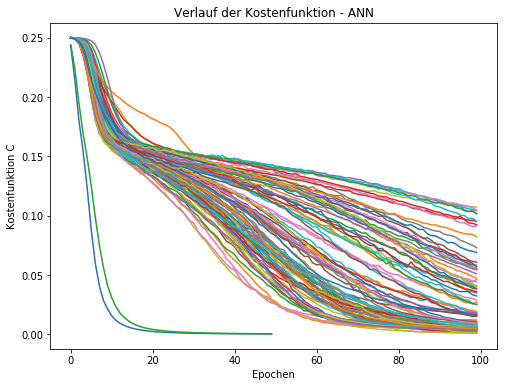

In [4]:
import os
import matplotlib.pyplot as plt

if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)

                    plt.plot(ann_net['history_loss'])
else:
    print('FAIL')

plt.title('Verlauf der Kostenfunktion - ANN')
plt.ylabel('Kostenfunktion C')
plt.xlabel('Epochen')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

pic_name=create_file_name()+'_bild'
plt.savefig(path + pic_name + '.png')

plt.show()

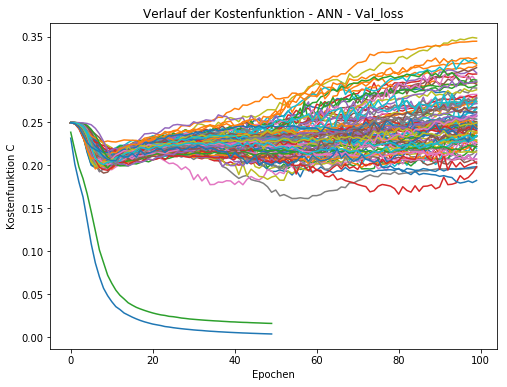

In [5]:
if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)

                    plt.plot(ann_net['history_val_loss'])
else:
    print('FAIL')

plt.title('Verlauf der Kostenfunktion - ANN - Val_loss')
plt.ylabel('Kostenfunktion C')
plt.xlabel('Epochen')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

pic_name=create_file_name()+'_bild_val_loss'
plt.savefig(path + pic_name + '.png')

plt.show()

In [6]:
def calc_mean(arr, start, stop):
    if start > stop:
        tmp = start
        start = stop
        stop = tmp
    sum = 0
    #print('laenge:', len(arr))
    j = 0
    for i in range(start, stop):
        sum = sum + arr[i]
        j = j + 1
    return (sum / j)


def calc_min(arr, start, stop):
    if start > stop:
        tmp = start
        start = stop
        stop = tmp
    min = 100.0
    j = 0
    for i in range(start, stop):
        if arr[i] < min:
            min = arr[i]
    return min

In [8]:
points=[]
min=100
units1_min=0
units2_min=2
if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)
                    temp_mean=calc_mean(ann_net['history_val_loss'],15,100)
                    temp_min=calc_min(ann_net['history_val_loss'],15,100)
                    if temp_min<min:
                        min=temp_min
                        units1_min= ann_net['units1']
                        units2_min= ann_net['units2']
                    if temp_mean<0.24: #ausschneiden
                        pointx=ann_net['units1']
                        pointy=ann_net['units2']
                        pointz=temp_mean
                        pointsrow=[]
                        pointsrow.append(pointx)
                        pointsrow.append(pointy)
                        pointsrow.append(pointz)
                        points.append(pointsrow)
else:
    print('FAIL')

   
print('minimales Netz')
print(min)
print(units1_min)
print(units2_min)
print('--------------------')
    
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2]) #scatter = punktdiagramme
plt.title("Kostvergleich ab Epoche 15-100 abhängig der Neuronen der Layer")
plt.xlabel("Neuronen erster Layer")
plt.ylabel("Neuronen zweiter Layer")
cbar = plt.colorbar()
cbar.set_label("Kosten", labelpad=+2)
figure = plt.gcf()  # get current figure
figure.set_size_inches(8, 6) 
pic_name=create_file_name()+'_bild_Neuronenvergleich'
plt.savefig(path + pic_name + '.png') 
plt.show()

IndexError: list index out of range